# Final Plots

In [44]:
feed_vecs = fan1_pair_vecs + fan2_pair_vecs + foil1_pair_vecs + foil2_pair_vecs

feed = BasicVecFeed(feed_vecs, feed_vecs, t_present, dimensions, len(feed_vecs), t_pause)

with nengolib.Network(seed=seed) as test_model:
    in_nd = nengo.Node(feed.feed)
    correct = nengo.Node(feed.get_answer)
    pause = nengo.Node(lambda t: feed.paused)
    output = nengo.Node(size_in=1)

    ens = nengo.Ensemble(n_neurons, dimensions,
                         encoders=fin_enc, intercepts=intercepts, seed=seed)
    
    with nengo.Config(nengo.Ensemble) as cfg:
        cfg[nengo.Ensemble].eval_points = nengo.dists.CosineSimilarity(dimensions + 2)
        cfg[nengo.Ensemble].intercepts = nengo.dists.CosineSimilarity(dimensions + 2)
        product = nengo.networks.Product(50, dimensions)

    nengo.Connection(in_nd, ens, synapse=None)
    nengo.Connection(pause, ens.neurons, transform=-10*np.ones((n_neurons, 1)), synapse=None)
    


    nengo.Connection(ens.neurons, product.input_a, transform=dec)
    nengo.Connection(correct, product.input_b, synapse=None)
    nengo.Connection(product.output, output, transform=np.ones((1, dimensions)))

    p_in = nengo.Probe(in_nd)
    p_cor = nengo.Probe(correct, synapse=None)
    p_out = nengo.Probe(output, synapse=0.01)

with nengo.Simulator(test_model) as test_sim:
    test_sim.run(len(feed_vecs)*t_each + t_pause)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

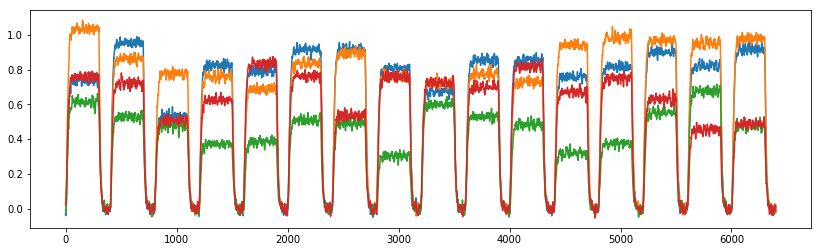

In [49]:
plt.figure(figsize=(14, 4))
plt.plot(test_sim.data[p_out][fan1_slc])
plt.plot(test_sim.data[p_out][fan2_slc])
plt.plot(test_sim.data[p_out][foil1_slc])
plt.plot(test_sim.data[p_out][foil2_slc])

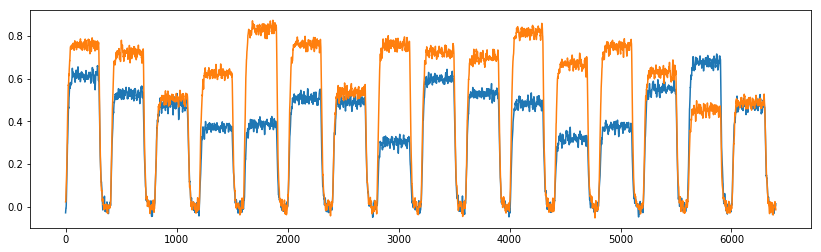

In [48]:
plt.figure(figsize=(14, 4))
plt.plot(test_sim.data[p_out][foil1_slc])
plt.plot(test_sim.data[p_out][foil2_slc])